In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, max_error

In [2]:
import sklearn
sklearn.__version__

'1.2.1'

# Reading data

In [3]:
df = pd.read_csv("dataset_18k.csv")
df

,Enrichment,FuelTemperature,WaterTemperature,Pitch,FuelRadius,WaterDensity,Keff,Std_dev
0,1.33,1500.0,429.426380,1.989,0.639,0.919,1.13121,0.00035
1,7.50,1022.8,440.093968,1.939,0.741,0.909,1.44104,0.00040
2,5.14,353.4,348.854867,1.384,0.581,0.981,1.29719,0.00045
3,7.54,717.7,330.850967,1.642,0.519,0.991,1.56388,0.00041
4,1.68,1166.0,407.411055,1.008,0.204,0.939,1.05865,0.00036
...,...,...,...,...,...,...,...,...
18081,5.56,488.4,339.837155,1.065,0.325,0.986,1.51146,0.00045
18082,5.48,1602.6,580.765243,1.669,0.749,0.709,1.10691,0.00043
18083,7.23,1656.6,501.660030,1.330,0.449,0.840,1.45195,0.00039
18084,6.96,1038.0,369.320282,1.172,0.511,0.968,1.21955,0.00037


In [4]:
df.describe()

,Enrichment,FuelTemperature,WaterTemperature,Pitch,FuelRadius,WaterDensity,Keff,Std_dev
count,18086.000000,18086.000000,18086.000000,18086.000000,18086.000000,18086.000000,18086.000000,18086.000000
mean,4.990335,1122.321619,444.603625,1.497257,0.472838,0.885416,1.354016,0.000398
std,2.300221,394.176216,86.525787,0.291036,0.153357,0.094512,0.171434,0.000034
min,1.000000,303.000000,300.001120,1.000000,0.200000,0.660000,0.568560,0.000240
25%,2.990000,788.550000,369.314983,1.244000,0.355000,0.818000,1.238733,0.000380
50%,4.980000,1125.450000,441.597679,1.496000,0.449000,0.908000,1.377630,0.000400
75%,6.960000,1461.175000,518.249645,1.748000,0.574000,0.968000,1.494355,0.000420
max,9.000000,1799.900000,599.945361,2.000000,0.899000,1.003000,1.633880,0.000520


In [5]:
df.corr()

,Enrichment,FuelTemperature,WaterTemperature,Pitch,FuelRadius,WaterDensity,Keff,Std_dev
Enrichment,1.000000,-0.006703,-0.003645,-0.004564,-0.003858,0.003986,0.712426,-0.113872
FuelTemperature,-0.006703,1.000000,0.100505,0.001280,-0.006048,-0.098156,-0.061140,0.040541
WaterTemperature,-0.003645,0.100505,1.000000,-0.000430,-0.000444,-0.979228,-0.081932,0.033506
Pitch,-0.004564,0.001280,-0.000430,1.000000,0.560433,0.002163,0.046329,-0.088317
FuelRadius,-0.003858,-0.006048,-0.000444,0.560433,1.000000,0.000297,-0.273000,0.245987
WaterDensity,0.003986,-0.098156,-0.979228,0.002163,0.000297,1.000000,0.084272,-0.034767
Keff,0.712426,-0.061140,-0.081932,0.046329,-0.273000,0.084272,1.000000,-0.114673
Std_dev,-0.113872,0.040541,0.033506,-0.088317,0.245987,-0.034767,-0.114673,1.000000


# Feature engineering

In [6]:
df['vmvf'] = (df['Pitch'] * df['Pitch'] / (np.pi * df['FuelRadius'] * df['FuelRadius'])) - 1 - (0.12 / df['FuelRadius']) - (0.0036 / (df['FuelRadius'] * df['FuelRadius']))
df

,Enrichment,FuelTemperature,WaterTemperature,Pitch,FuelRadius,WaterDensity,Keff,Std_dev,vmvf
0,1.33,1500.0,429.426380,1.989,0.639,0.919,1.13121,0.00035,1.887416
1,7.50,1022.8,440.093968,1.939,0.741,0.909,1.44104,0.00040,1.011063
2,5.14,353.4,348.854867,1.384,0.581,0.981,1.29719,0.00045,0.589012
3,7.54,717.7,330.850967,1.642,0.519,0.991,1.56388,0.00041,1.941538
4,1.68,1166.0,407.411055,1.008,0.204,0.939,1.05865,0.00036,6.096867
...,...,...,...,...,...,...,...,...,...
18081,5.56,488.4,339.837155,1.065,0.325,0.986,1.51146,0.00045,2.014770
18082,5.48,1602.6,580.765243,1.669,0.749,0.709,1.10691,0.00043,0.413886
18083,7.23,1656.6,501.660030,1.330,0.449,0.840,1.45195,0.00039,1.507817
18084,6.96,1038.0,369.320282,1.172,0.511,0.968,1.21955,0.00037,0.425796


In [8]:
features = df.drop(['Keff', 'Std_dev', 'WaterDensity'], axis=1)
labels = df['Keff']

In [9]:
features

,Enrichment,FuelTemperature,WaterTemperature,Pitch,FuelRadius,vmvf
0,1.33,1500.0,429.426380,1.989,0.639,1.887416
1,7.50,1022.8,440.093968,1.939,0.741,1.011063
2,5.14,353.4,348.854867,1.384,0.581,0.589012
3,7.54,717.7,330.850967,1.642,0.519,1.941538
4,1.68,1166.0,407.411055,1.008,0.204,6.096867
...,...,...,...,...,...,...
18081,5.56,488.4,339.837155,1.065,0.325,2.014770
18082,5.48,1602.6,580.765243,1.669,0.749,0.413886
18083,7.23,1656.6,501.660030,1.330,0.449,1.507817
18084,6.96,1038.0,369.320282,1.172,0.511,0.425796


In [10]:
labels

0        1.13121
1        1.44104
2        1.29719
3        1.56388
4        1.05865
          ...   
18081    1.51146
18082    1.10691
18083    1.45195
18084    1.21955
18085    1.40361
Name: Keff, Length: 18086, dtype: float64

In [11]:
x_train, x_val, y_train, y_val = train_test_split(features, labels, test_size=0.2)

In [12]:
y_train

15354    1.11762
7438     1.19798
3133     1.15625
1633     1.49518
619      1.24314
          ...   
13474    1.47711
13144    1.09461
6698     1.11145
5167     1.04375
10672    1.61719
Name: Keff, Length: 14468, dtype: float64

# Initial ML model

In [13]:
model = MLPRegressor(hidden_layer_sizes=(12, ), 
                     activation='tanh', 
                     batch_size=64, 
                     learning_rate='constant', 
                     learning_rate_init=1e-4, 
                     early_stopping=True,
                     validation_fraction=0.1,
                     tol=1e-4, 
                     verbose=True, 
                     n_iter_no_change=10, 
                     max_iter=50000)
X = x_train.values
y = y_train.values
model.fit(X, y)

Iteration 1, loss = 5.23624082
Validation score: -315.424724
Iteration 2, loss = 4.25730077
Validation score: -253.653588
Iteration 3, loss = 3.39318566
Validation score: -198.251365
Iteration 4, loss = 2.65516266
Validation score: -152.607356
Iteration 5, loss = 2.01525426
Validation score: -113.762795
Iteration 6, loss = 1.48461765
Validation score: -82.711251
Iteration 7, loss = 1.06851647
Validation score: -59.014260
Iteration 8, loss = 0.75248740
Validation score: -40.205382
Iteration 9, loss = 0.52172087
Validation score: -27.727328
Iteration 10, loss = 0.36830189
Validation score: -18.328578
Iteration 11, loss = 0.25477971
Validation score: -12.592349
Iteration 12, loss = 0.17762325
Validation score: -8.376051
Iteration 13, loss = 0.11812535
Validation score: -5.149848
Iteration 14, loss = 0.08084559
Validation score: -3.385726
Iteration 15, loss = 0.05958476
Validation score: -2.315705
Iteration 16, loss = 0.04477216
Validation score: -1.582824
Iteration 17, loss = 0.03641769
V

Iteration 141, loss = 0.00025421
Validation score: 0.979861
Iteration 142, loss = 0.00025792
Validation score: 0.979713
Iteration 143, loss = 0.00027290
Validation score: 0.979984
Iteration 144, loss = 0.00024977
Validation score: 0.980273
Iteration 145, loss = 0.00023516
Validation score: 0.984365
Iteration 146, loss = 0.00024920
Validation score: 0.980489
Iteration 147, loss = 0.00023993
Validation score: 0.984423
Iteration 148, loss = 0.00024025
Validation score: 0.983160
Iteration 149, loss = 0.00023263
Validation score: 0.984343
Iteration 150, loss = 0.00021381
Validation score: 0.974029
Iteration 151, loss = 0.00022802
Validation score: 0.985152
Iteration 152, loss = 0.00021246
Validation score: 0.984747
Iteration 153, loss = 0.00021757
Validation score: 0.984518
Iteration 154, loss = 0.00021604
Validation score: 0.985681
Iteration 155, loss = 0.00020873
Validation score: 0.980219
Iteration 156, loss = 0.00021999
Validation score: 0.986067
Iteration 157, loss = 0.00022689
Validat

MLPRegressor(activation='tanh', batch_size=64, early_stopping=True,
             hidden_layer_sizes=(12,), learning_rate_init=0.0001,
             max_iter=50000, verbose=True)

# Hyperparameter tuning

In [14]:
params = {"activation":["tanh", "logistic", "relu"], 
          "learning_rate_init":[1e-4, 1e-3, 5e-4, 2e-4], 
          "hidden_layer_sizes":[(12, ), (20, ), (5, ), (100, ), (150, ), (500, )]}
rnd_search = RandomizedSearchCV(estimator=model, param_distributions=params, n_jobs=-1, n_iter=3, verbose=1)
rnd_search.fit(X, y)
rnd_search.best_score_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Iteration 1, loss = 0.02668974
Validation score: -0.066971
Iteration 2, loss = 0.01458920
Validation score: 0.050534
Iteration 3, loss = 0.01250863
Validation score: 0.264033
Iteration 4, loss = 0.00987432
Validation score: 0.391875
Iteration 5, loss = 0.00824325
Validation score: 0.478403
Iteration 6, loss = 0.00722574
Validation score: 0.517970
Iteration 7, loss = 0.00686890
Validation score: 0.546349
Iteration 8, loss = 0.00665773
Validation score: 0.572301
Iteration 9, loss = 0.00634956
Validation score: 0.578855
Iteration 10, loss = 0.00614919
Validation score: 0.582706
Iteration 11, loss = 0.00573458
Validation score: 0.636315
Iteration 12, loss = 0.00538849
Validation score: 0.649581
Iteration 13, loss = 0.00500982
Validation score: 0.683875
Iteration 14, loss = 0.00465333
Validation score: 0.713640
Iteration 15, loss = 0.00408130
Validation score: 0.755665
Iteration 16, loss = 0.00372593
Validation score: 0.762094
Iter

0.9865220708146634

In [18]:
rnd_search.best_params_

{'learning_rate_init': 0.0002,
 'hidden_layer_sizes': (150,),
 'activation': 'tanh'}

# KFold Cross Validation

In [15]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [16]:
scores = cross_val_score(estimator=model, X=X, y=y, cv=cv, n_jobs=-1)

In [17]:
scores

array([ 0.99081689,  0.98797682,  0.98713828,  0.98870918, -0.00406293])

In [26]:
scores.mean()

0.9846096245414184

# Accuracy evaluation

In [19]:
model.loss_

0.00015462164443102693

In [20]:
y_predict = model.predict(x_val.values)

In [21]:
y_val.values

array([1.42145, 1.51322, 1.333  , ..., 1.25684, 1.61234, 1.17672])

In [22]:
y_predict

array([1.41186944, 1.50918969, 1.31827274, ..., 1.25195197, 1.61457005,
       1.18531406])

In [23]:
r_squared = model.score(x_val.values, y_val.values)
test_set_rmse = np.sqrt(mean_squared_error(y_val.values, y_predict))
test_mae = mean_absolute_error(y_predict, y_val.values)
print("r_squared = ", r_squared)
print("RMSE = ", test_set_rmse)
print("MAE = ", test_mae)
print("MAE_PERCENTAGE = ", mean_absolute_percentage_error(y_val.values, y_predict) * 100000)
print("MAX_ERROR = ", max_error(y_val.values, y_predict)*100000.)

r_squared =  0.9914713008915237
RMSE =  0.016056877649126073
MAE =  0.011431532085646469
MAE_PERCENTAGE =  916.6036703441879
MAX_ERROR =  19744.169262110157


In [24]:
y_predict = model.predict(features.values)

In [25]:
df["deltaKabs"] = np.abs(df["Keff"]-y_predict) * 100000
df["deltaKabs"] = df["deltaKabs"].round()
df

,Enrichment,FuelTemperature,WaterTemperature,Pitch,FuelRadius,WaterDensity,Keff,Std_dev,vmvf,deltaKabs
0,1.33,1500.0,429.426380,1.989,0.639,0.919,1.13121,0.00035,1.887416,1198.0
1,7.50,1022.8,440.093968,1.939,0.741,0.909,1.44104,0.00040,1.011063,564.0
2,5.14,353.4,348.854867,1.384,0.581,0.981,1.29719,0.00045,0.589012,875.0
3,7.54,717.7,330.850967,1.642,0.519,0.991,1.56388,0.00041,1.941538,945.0
4,1.68,1166.0,407.411055,1.008,0.204,0.939,1.05865,0.00036,6.096867,579.0
...,...,...,...,...,...,...,...,...,...,...
18081,5.56,488.4,339.837155,1.065,0.325,0.986,1.51146,0.00045,2.014770,696.0
18082,5.48,1602.6,580.765243,1.669,0.749,0.709,1.10691,0.00043,0.413886,2948.0
18083,7.23,1656.6,501.660030,1.330,0.449,0.840,1.45195,0.00039,1.507817,1169.0
18084,6.96,1038.0,369.320282,1.172,0.511,0.968,1.21955,0.00037,0.425796,741.0


In [26]:
df["deltaKrel"] = np.abs((y_predict - df["Keff"])/df["Keff"]) * 100000
df["deltaKrel"] = df["deltaKrel"].round()
df

,Enrichment,FuelTemperature,WaterTemperature,Pitch,FuelRadius,WaterDensity,Keff,Std_dev,vmvf,deltaKabs,deltaKrel
0,1.33,1500.0,429.426380,1.989,0.639,0.919,1.13121,0.00035,1.887416,1198.0,1059.0
1,7.50,1022.8,440.093968,1.939,0.741,0.909,1.44104,0.00040,1.011063,564.0,391.0
2,5.14,353.4,348.854867,1.384,0.581,0.981,1.29719,0.00045,0.589012,875.0,674.0
3,7.54,717.7,330.850967,1.642,0.519,0.991,1.56388,0.00041,1.941538,945.0,604.0
4,1.68,1166.0,407.411055,1.008,0.204,0.939,1.05865,0.00036,6.096867,579.0,547.0
...,...,...,...,...,...,...,...,...,...,...,...
18081,5.56,488.4,339.837155,1.065,0.325,0.986,1.51146,0.00045,2.014770,696.0,460.0
18082,5.48,1602.6,580.765243,1.669,0.749,0.709,1.10691,0.00043,0.413886,2948.0,2663.0
18083,7.23,1656.6,501.660030,1.330,0.449,0.840,1.45195,0.00039,1.507817,1169.0,805.0
18084,6.96,1038.0,369.320282,1.172,0.511,0.968,1.21955,0.00037,0.425796,741.0,608.0


In [28]:
df.describe(percentiles=[0.9, 0.95, 0.99])

,Enrichment,FuelTemperature,WaterTemperature,Pitch,FuelRadius,WaterDensity,Keff,Std_dev,vmvf,deltaKabs,deltaKrel
count,18086.000000,18086.000000,18086.000000,18086.000000,18086.000000,18086.000000,18086.000000,18086.000000,18086.000000,18086.000000,18086.000000
mean,4.990335,1122.321619,444.603625,1.497257,0.472838,0.885416,1.354016,0.000398,2.744388,1130.293431,898.485790
std,2.300221,394.176216,86.525787,0.291036,0.153357,0.094512,0.171434,0.000034,2.649116,1091.618886,1037.075019
min,1.000000,303.000000,300.001120,1.000000,0.200000,0.660000,0.568560,0.000240,0.342911,0.000000,0.000000
50%,4.980000,1125.450000,441.597679,1.496000,0.449000,0.908000,1.377630,0.000400,1.824023,859.000000,623.000000
90%,8.190000,1663.950000,567.325428,1.902000,0.698000,0.992000,1.559590,0.000440,6.297084,2357.500000,1894.500000
95%,8.570000,1730.375000,583.955546,1.951000,0.762000,0.999000,1.583798,0.000450,8.173267,3113.250000,2702.750000
99%,8.900000,1785.200000,596.580145,1.991000,0.851000,1.002000,1.610604,0.000480,12.216042,5330.300000,5195.350000
max,9.000000,1799.900000,599.945361,2.000000,0.899000,1.003000,1.633880,0.000520,26.279957,19744.000000,21158.000000


In [29]:
df_high_error = df[df["deltaKabs"] > 5329]
df_high_error

,Enrichment,FuelTemperature,WaterTemperature,Pitch,FuelRadius,WaterDensity,Keff,Std_dev,vmvf,deltaKabs,deltaKrel
97,3.05,1336.4,564.489967,1.975,0.886,0.743,1.04851,0.00040,0.441647,5423.0,5172.0
207,3.31,1402.0,569.458275,1.687,0.771,0.733,0.99840,0.00041,0.362255,6615.0,6626.0
334,3.14,913.1,416.197879,1.900,0.870,0.931,1.09059,0.00037,0.375477,5426.0,4976.0
549,2.29,1496.4,564.816655,1.275,0.206,0.742,1.10208,0.00038,10.526358,6920.0,6279.0
578,3.63,665.0,311.529998,1.953,0.305,0.999,1.17254,0.00036,11.619193,6428.0,5482.0
...,...,...,...,...,...,...,...,...,...,...,...
17504,2.14,1145.9,531.494728,1.584,0.207,0.799,0.87746,0.00031,16.975153,11899.0,13561.0
17684,1.39,671.8,516.814045,1.344,0.203,0.820,0.80325,0.00029,12.274154,5863.0,7299.0
17930,1.15,1475.2,530.128659,1.085,0.309,0.801,1.02561,0.00034,2.498522,6155.0,6001.0
17946,2.67,1441.9,553.585398,1.537,0.697,0.763,0.96794,0.00041,0.368285,5616.0,5802.0


In [30]:
df_high_error.describe()

,Enrichment,FuelTemperature,WaterTemperature,Pitch,FuelRadius,WaterDensity,Keff,Std_dev,vmvf,deltaKabs,deltaKrel
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,2.597747,1080.479121,464.276447,1.589066,0.443203,0.855044,1.018569,0.000368,6.548188,6906.774725,6949.824176
std,1.757164,397.439005,102.442887,0.277338,0.243734,0.115598,0.145451,0.000046,6.539940,1956.713365,2368.317754
min,1.000000,358.000000,301.700583,1.012000,0.200000,0.662000,0.568560,0.000250,0.342911,5330.000000,3818.000000
25%,1.120000,713.925000,365.610508,1.405000,0.235000,0.749500,0.934840,0.000330,0.408085,5824.750000,5522.250000
50%,2.175000,1118.250000,491.249812,1.651500,0.331500,0.853000,1.012220,0.000370,4.053846,6301.500000,6374.500000
75%,3.455000,1434.200000,560.909413,1.825250,0.690250,0.970750,1.097433,0.000400,11.120097,7209.250000,7613.500000
max,8.540000,1746.100000,599.036390,1.999000,0.898000,1.003000,1.477040,0.000480,25.499766,19744.000000,21158.000000


In [31]:
import matplotlib.pyplot as plt

(array([1.0166e+04, 5.2850e+03, 1.6020e+03, 5.5700e+02, 2.4300e+02,
        1.0800e+02, 6.4000e+01, 3.3000e+01, 1.1000e+01, 6.0000e+00,
        3.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([    0. ,   987.2,  1974.4,  2961.6,  3948.8,  4936. ,  5923.2,
         6910.4,  7897.6,  8884.8,  9872. , 10859.2, 11846.4, 12833.6,
        13820.8, 14808. , 15795.2, 16782.4, 17769.6, 18756.8, 19744. ]),
 <BarContainer object of 20 artists>)

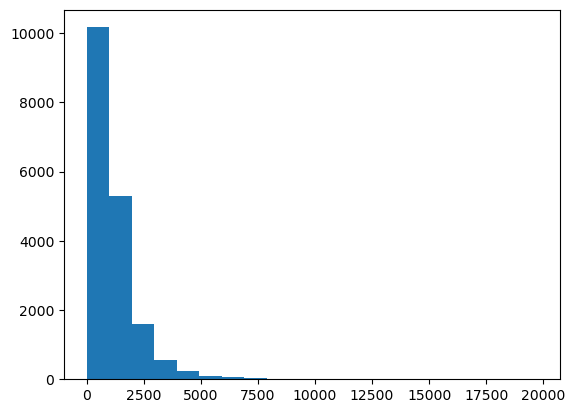

In [32]:
plt.hist(df["deltaKabs"], bins=20)